In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                                # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [2]:
ds_air = pd.read_csv('beijing_train.csv')
print('Data shape : ', ds_air.shape)
ds_air.head()

Data shape :  (403776, 18)


,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.00,4.00,4.00,7.00,300.00,77.00,-0.70,1023.00,-18.80,0.00,NNW,4.40,Aotizhongxin
1,2,2013,3,1,1,8.00,8.00,4.00,7.00,300.00,77.00,-1.10,1023.20,-18.20,0.00,N,4.70,Aotizhongxin
2,3,2013,3,1,2,7.00,7.00,5.00,10.00,300.00,73.00,-1.10,1023.50,-18.20,0.00,NNW,5.60,Aotizhongxin
3,4,2013,3,1,3,6.00,6.00,11.00,11.00,300.00,72.00,-1.40,1024.50,-19.40,0.00,NW,3.10,Aotizhongxin
4,5,2013,3,1,4,3.00,3.00,12.00,12.00,300.00,72.00,-2.00,1025.20,-19.50,0.00,N,2.00,Aotizhongxin


In [3]:
ds_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [4]:
100*((ds_air.shape[0]-ds_air.count())/ds_air.shape[0])

REF_NO    0.00
year      0.00
month     0.00
day       0.00
hour      0.00
PM2.5     2.10
PM10      1.54
SO2       2.17
NO2       2.94
CO        5.02
O3        3.22
TEMP      0.07
PRES      0.07
DEWP      0.07
RAIN      0.06
wd        0.34
WSPM      0.06
station   0.00
dtype: float64

In [5]:
ds_air.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.00,403776.00,403776.00,403776.00,403776.00,395301.00,397554.00,395000.00,391917.00,383515.00,390769.00,403512.00,403511.00,403507.00,403515.00,403538.00
mean,16824.50,2014.56,6.74,15.75,11.50,79.25,104.33,15.73,50.35,1214.84,58.12,14.09,1010.28,3.16,0.07,1.72
std,9713.35,1.10,3.36,8.81,6.92,79.15,90.14,21.74,34.77,1124.29,57.38,11.30,10.36,13.62,0.84,1.24
min,1.00,2013.00,1.00,1.00,0.00,2.00,2.00,0.29,1.03,100.00,0.21,-19.90,982.40,-43.40,0.00,0.00
25%,8412.75,2014.00,4.00,8.00,5.75,21.00,36.00,2.00,23.00,500.00,11.00,4.00,1002.00,-8.00,0.00,0.90
50%,16824.50,2015.00,7.00,16.00,11.50,55.00,83.00,7.00,43.00,900.00,45.00,15.40,1009.80,4.20,0.00,1.40
75%,25236.25,2016.00,10.00,23.00,17.25,110.00,145.00,19.00,71.00,1500.00,83.00,23.50,1018.30,15.50,0.00,2.20
max,33648.00,2016.00,12.00,31.00,23.00,999.00,999.00,500.00,290.00,10000.00,1071.00,41.60,1042.80,29.10,72.50,13.20


In [26]:
ds_air['year'].value_counts()

2016    105408
2014    105120
2015    105120
2013     88128
Name: year, dtype: int64

In [14]:
ds = ds_air.iloc[:,10:-1]

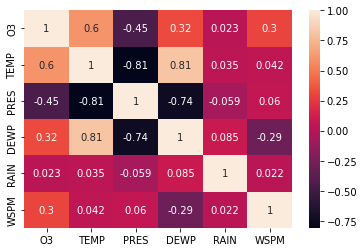

In [20]:
sns.heatmap(ds.corr(), annot=True );

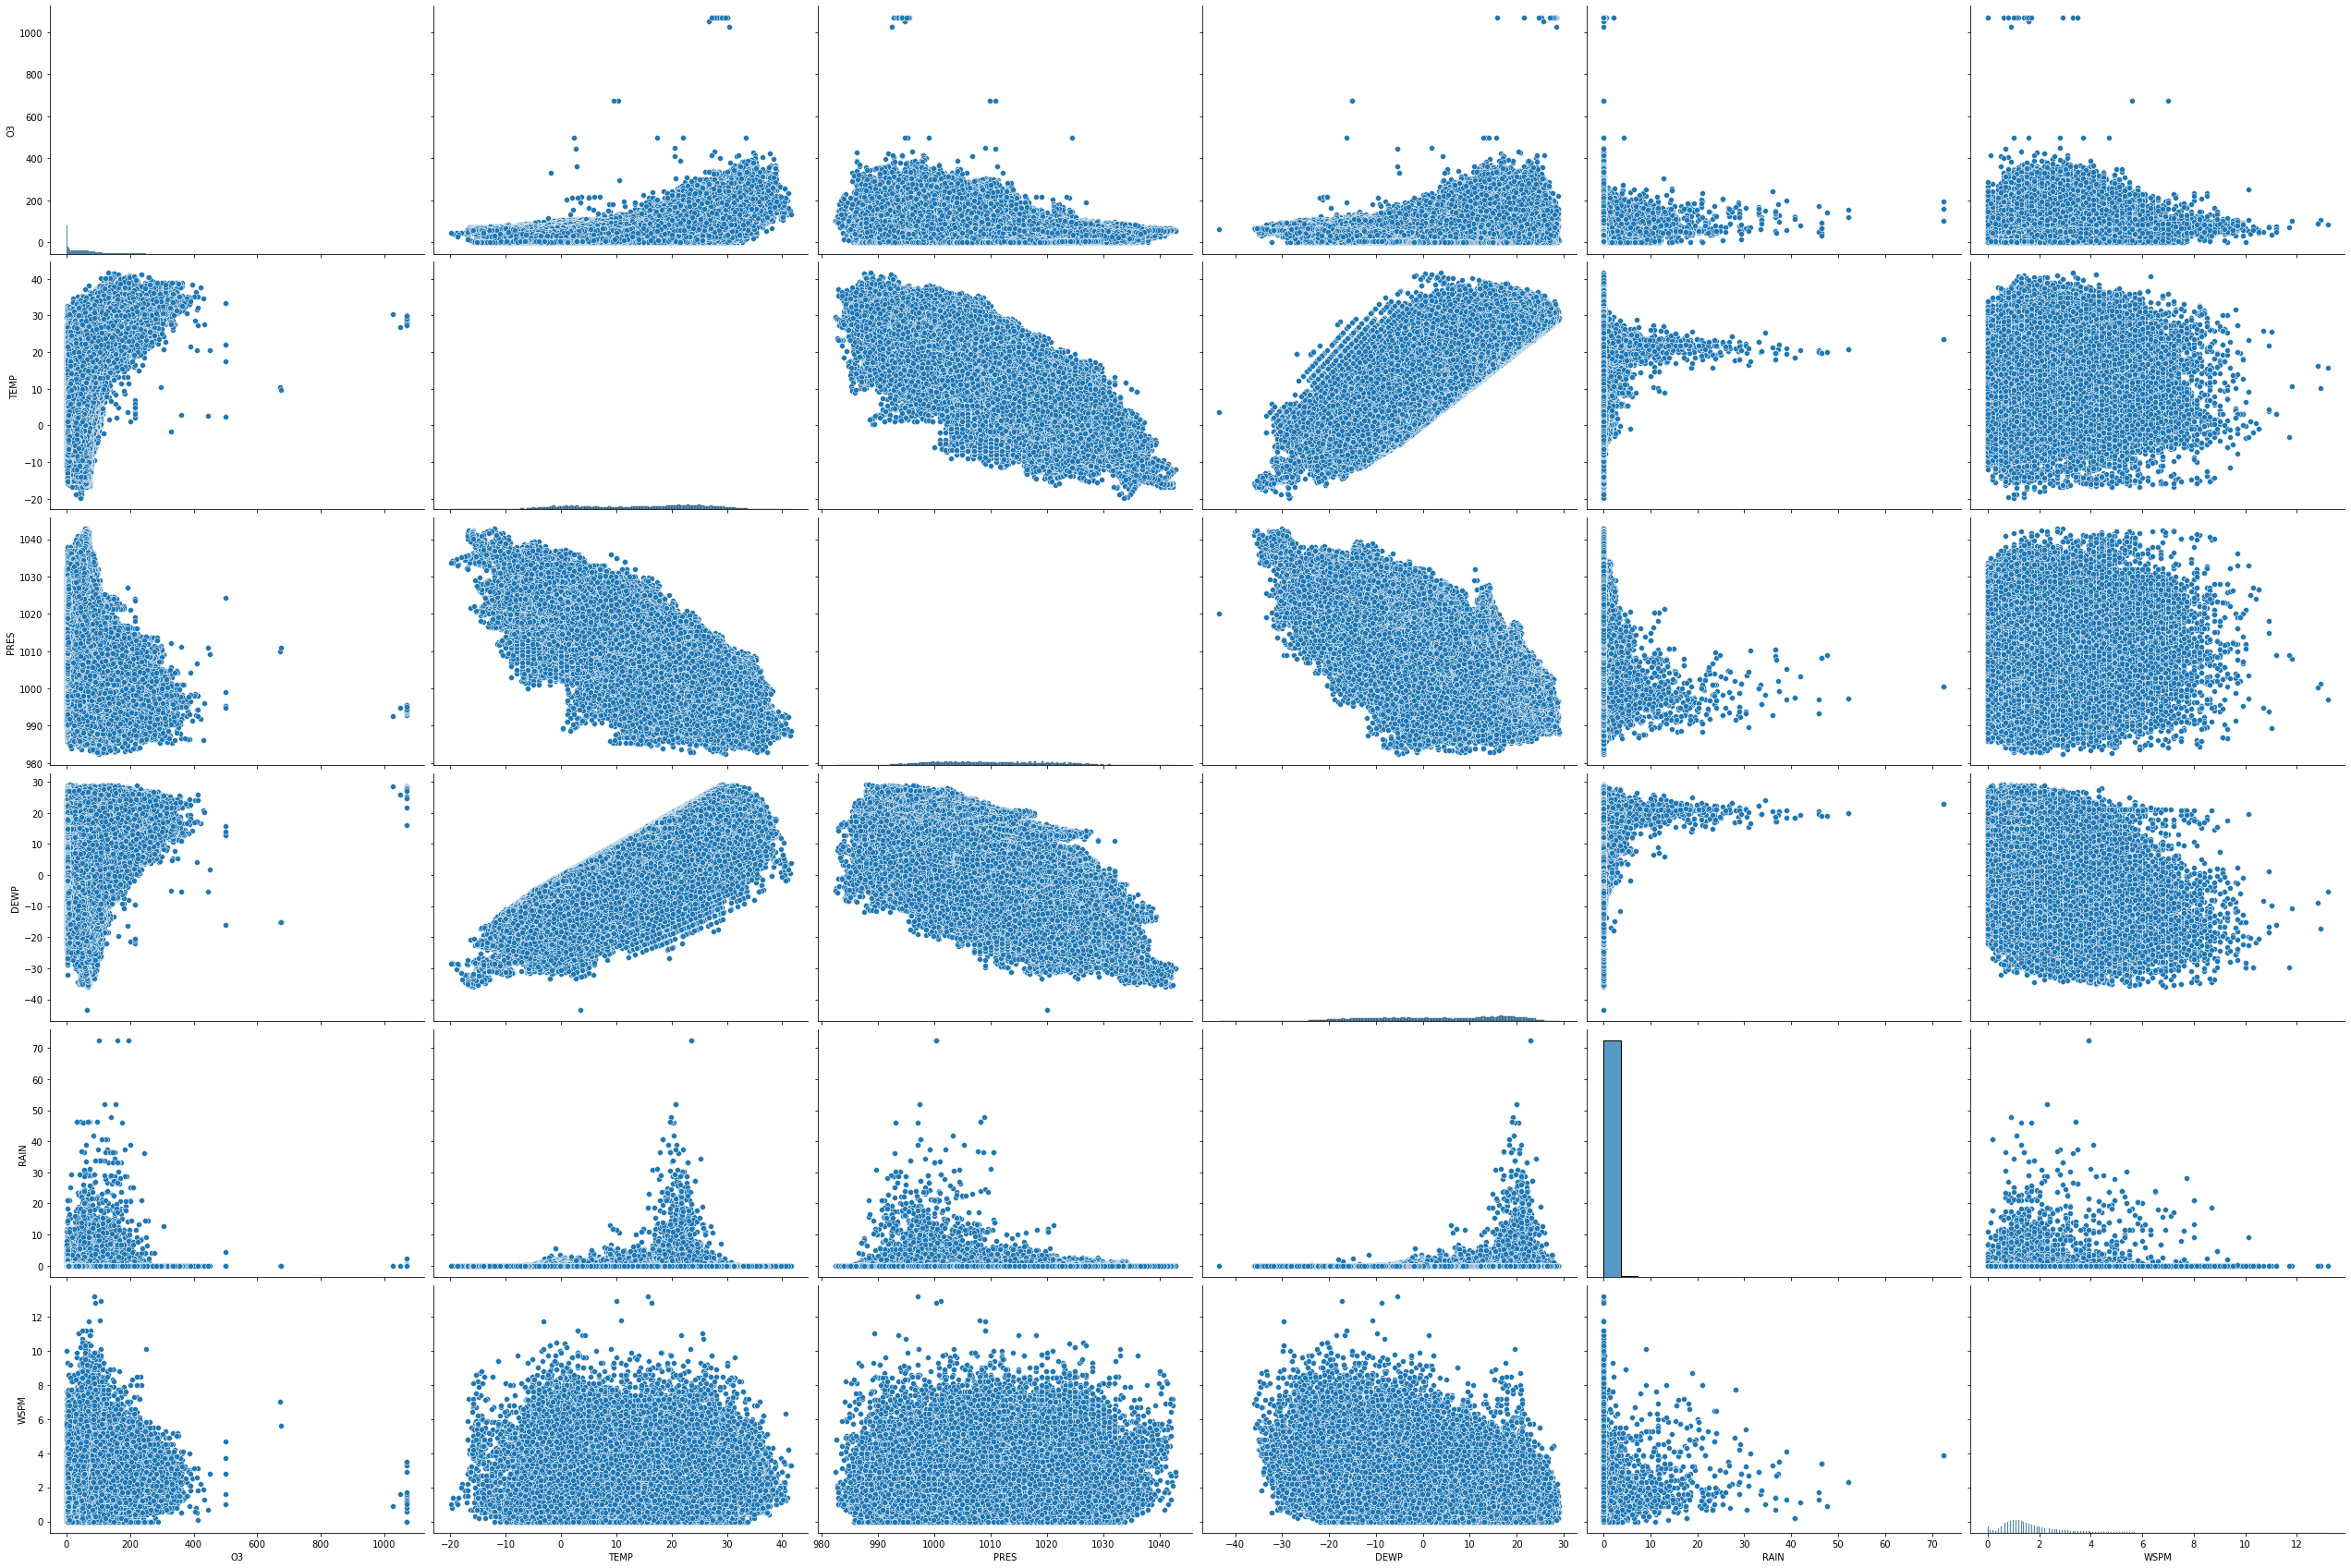

In [15]:
sns.pairplot(ds, size = 4, aspect = 1.5)

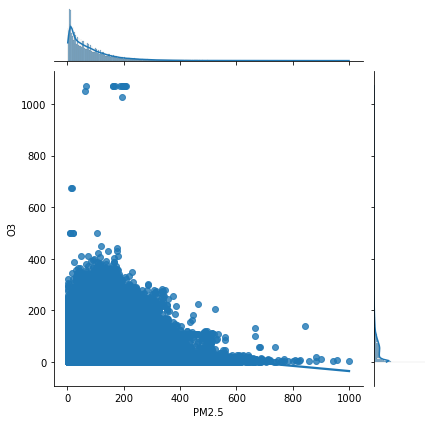

In [19]:
sns.jointplot("PM2.5", "O3", data=ds_air, kind='reg')

In [17]:
ds_air.groupby('station')['PM2.5'].mean()

station
Aotizhongxin    82.26
Changping       70.72
Dingling        65.89
Dongsi          85.47
Guanyuan        82.52
Gucheng         83.11
Huairou         69.43
Nongzhanguan    84.13
Shunyi          78.80
Tiantan         81.48
Wanliu          82.92
Wanshouxigong   84.09
Name: PM2.5, dtype: float64

In [21]:
ds_air[ds_air['TEMP']==0].shape

(2642, 18)

In [22]:
ds_air[ds_air['RAIN']==0].shape

(387119, 18)

In [24]:
ds_air[ds_air['PRES']==0].shape

(0, 18)

In [25]:
ds_air[ds_air['PM10']==0].shape

(0, 18)